# Project Description

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

## -- Input features-

1. W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.


2. R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.


3. AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.


4. H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.


5. 2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.


6. 3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.


7. HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.


8. BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.


9. SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.


10. SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.


11. RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.


12. ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.


13. ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.


14. CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.


15. SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.


16. SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.


17. E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.

# -- Output--

Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [40]:
import pandas as pd
import numpy as np
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score, median_absolute_error, max_error,accuracy_score, mean_absolute_percentage_error

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Importing Datset

In [4]:
df=pd.read_csv('C:\\Users\\HP\\Downloads\\baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
df.rename(columns={'W':'Wins','R':'Runs','AB':'At Bats','H':'Hits','2B':"Doubles",'3B':"Triples",
                   'HR':'HomeRuns','BB':'Walks','SO':'Strike Outs','SB':'Stolen Bases','RA':'Runs Allowed',
                   'ER':'Earned Runs','ERA':'Earned Run Average (ERA)','CG':'Complete Games','SHO':'Shutouts','SV':'Saves',
                   'E':"Errors"}, inplace=True)
df

,Wins,Runs,At Bats,Hits,Doubles,Triples,HomeRuns,Walks,Strike Outs,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [6]:
df.head()

,Wins,Runs,At Bats,Hits,Doubles,Triples,HomeRuns,Walks,Strike Outs,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
df.sample(15)

,Wins,Runs,At Bats,Hits,Doubles,Triples,HomeRuns,Walks,Strike Outs,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
17,97,689,5491,1341,272,30,171,567,1518,95,608,546,3.36,6,21,48,111
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
20,90,683,5527,1351,295,17,177,488,1290,51,613,557,3.43,1,14,50,88
12,85,661,5417,1331,243,21,176,435,1150,52,675,630,3.94,2,12,46,93
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
19,64,640,5571,1382,257,27,167,496,1255,134,754,700,4.33,2,8,35,90
16,98,697,5631,1462,292,27,140,461,1322,98,596,532,3.21,0,13,54,122
22,71,613,5463,1420,236,40,120,375,1150,112,678,638,4.02,0,12,35,77
18,68,655,5480,1378,274,34,145,412,1299,84,737,682,4.28,1,7,40,116
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [9]:
df.tail()

,Wins,Runs,At Bats,Hits,Doubles,Triples,HomeRuns,Walks,Strike Outs,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [10]:
df.shape

(30, 17)

# Exploratory Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wins                      30 non-null     int64  
 1   Runs                      30 non-null     int64  
 2   At Bats                   30 non-null     int64  
 3   Hits                      30 non-null     int64  
 4   Doubles                   30 non-null     int64  
 5   Triples                   30 non-null     int64  
 6   HomeRuns                  30 non-null     int64  
 7   Walks                     30 non-null     int64  
 8   Strike Outs               30 non-null     int64  
 9   Stolen Bases              30 non-null     int64  
 10  Runs Allowed              30 non-null     int64  
 11  Earned Runs               30 non-null     int64  
 12  Earned Run Average (ERA)  30 non-null     float64
 13  Complete Games            30 non-null     int64  
 14  Shutouts    

In [13]:
print("Total Missing values in dataset:- ", df.isnull().sum().sum())
print('\n')
print(df.isnull().sum())

Total Missing values in dataset:-  0


Wins                        0
Runs                        0
At Bats                     0
Hits                        0
Doubles                     0
Triples                     0
HomeRuns                    0
Walks                       0
Strike Outs                 0
Stolen Bases                0
Runs Allowed                0
Earned Runs                 0
Earned Run Average (ERA)    0
Complete Games              0
Shutouts                    0
Saves                       0
Errors                      0
dtype: int64


In [15]:
#checking duplicate values
print("Total duplicate values :-", df.duplicated().sum())

Total duplicate values :- 0


In [16]:
#Checking unique values
df.nunique()

Wins                        24
Runs                        28
At Bats                     29
Hits                        29
Doubles                     22
Triples                     23
HomeRuns                    27
Walks                       29
Strike Outs                 29
Stolen Bases                27
Runs Allowed                30
Earned Runs                 30
Earned Run Average (ERA)    30
Complete Games               9
Shutouts                    12
Saves                       20
Errors                      21
dtype: int64

In [17]:
df.corr()

,Wins,Runs,At Bats,Hits,Doubles,Triples,HomeRuns,Walks,Strike Outs,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HomeRuns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strike Outs,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


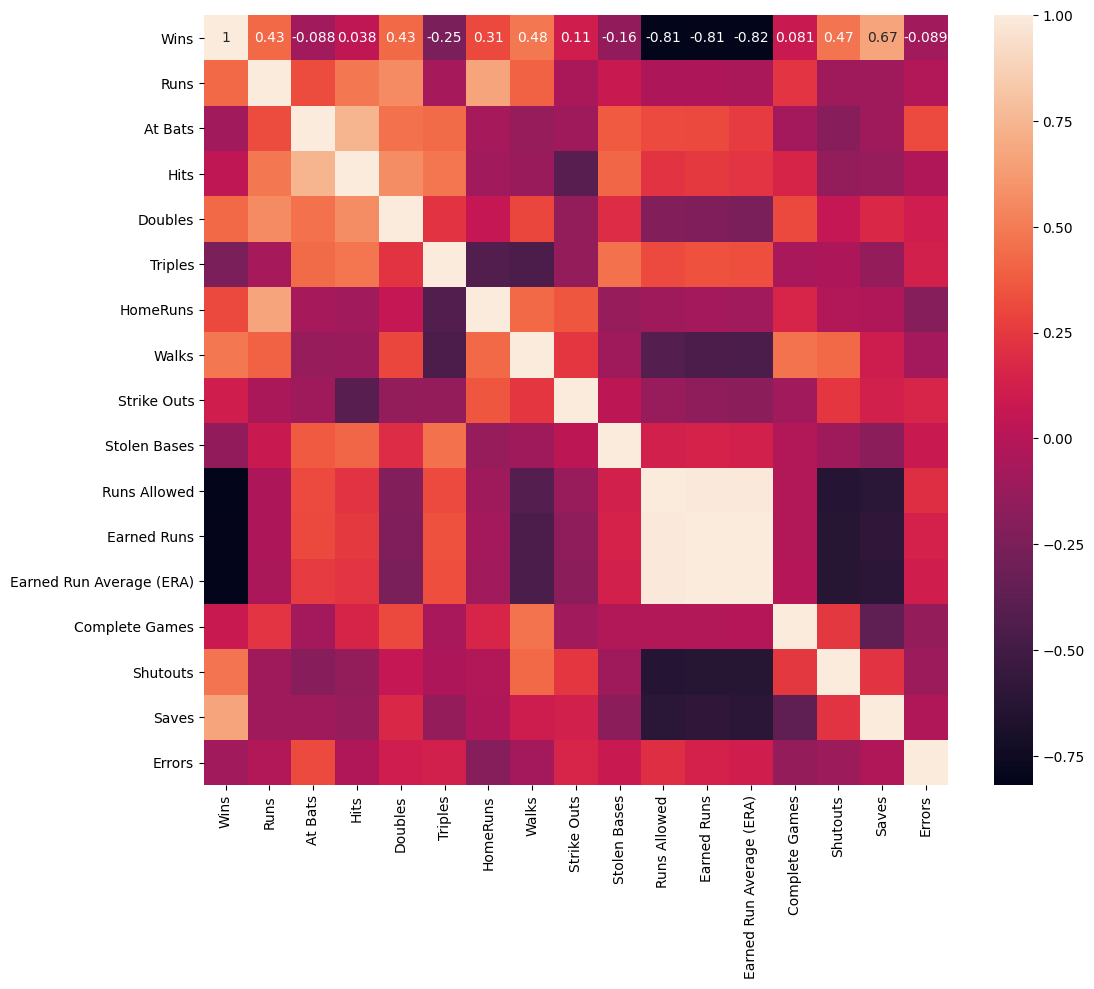

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

Runs allowed and earned runs are higly positive correlated winsand ERA are negetively correlated

# Data Visualization

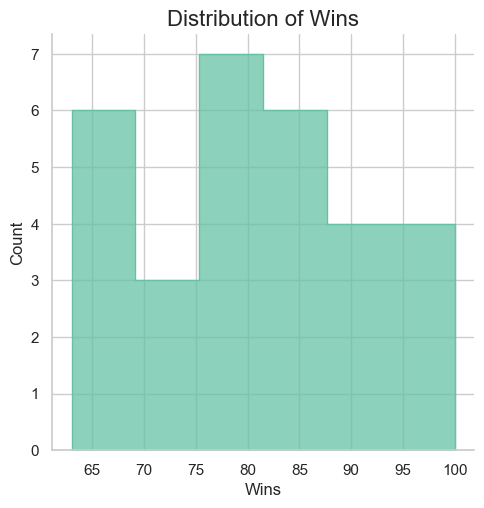

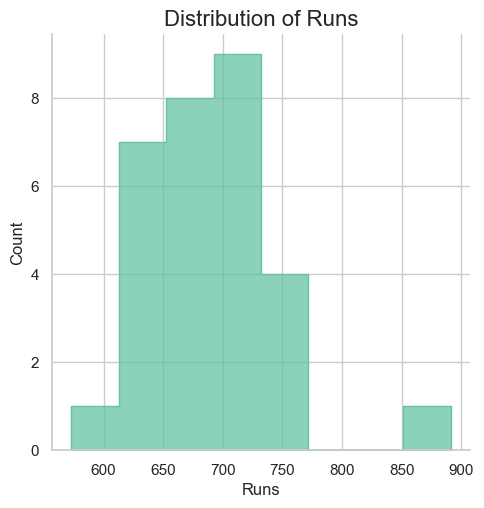

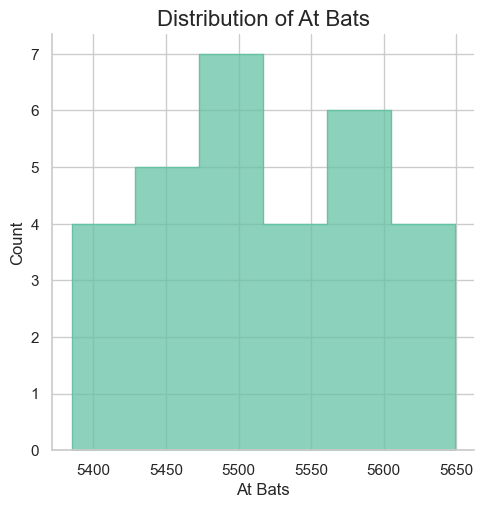

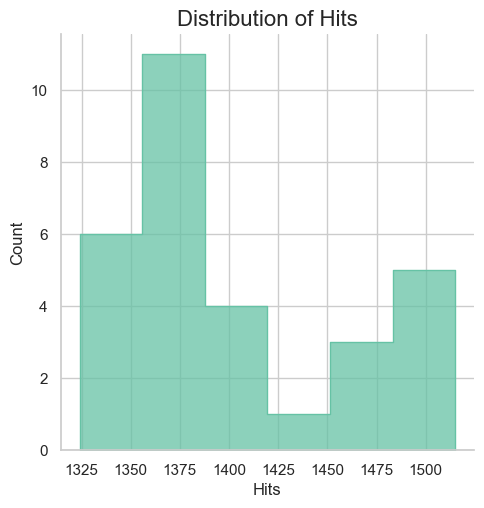

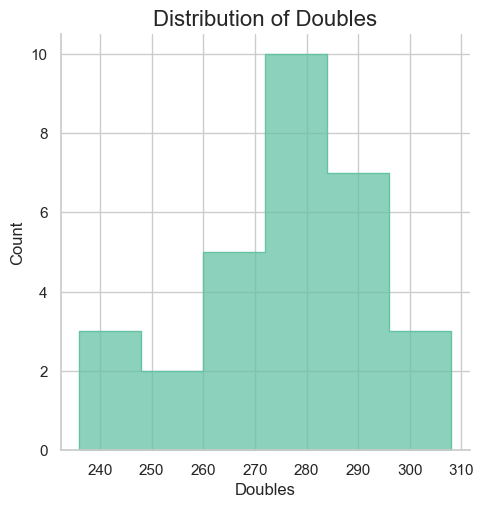

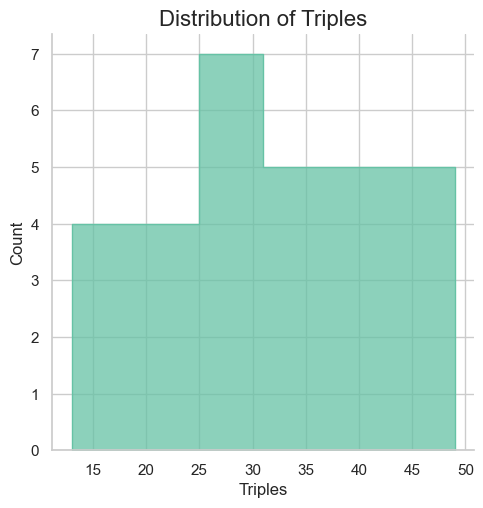

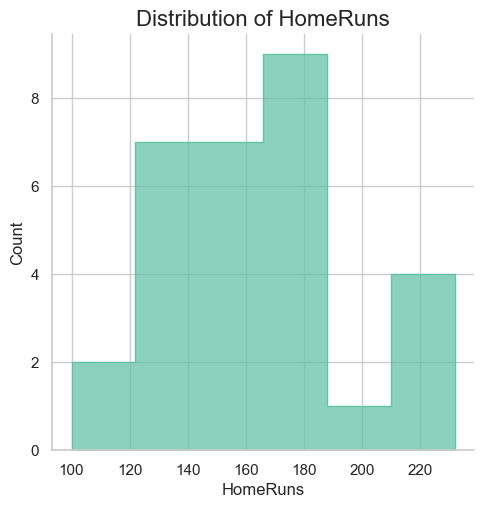

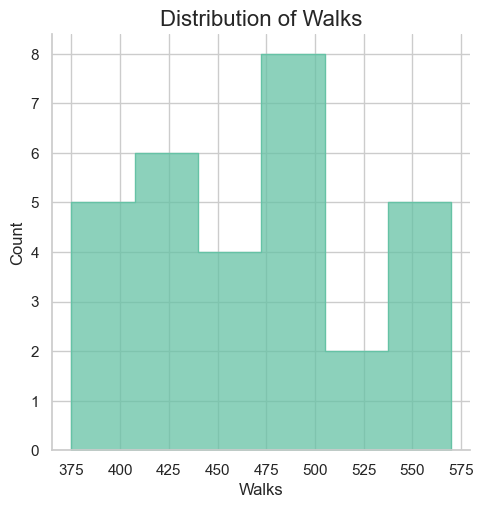

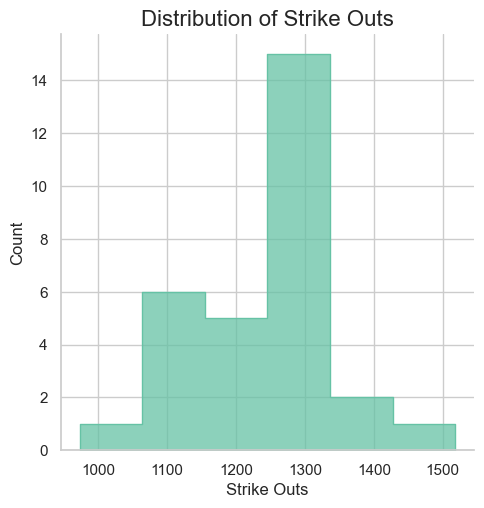

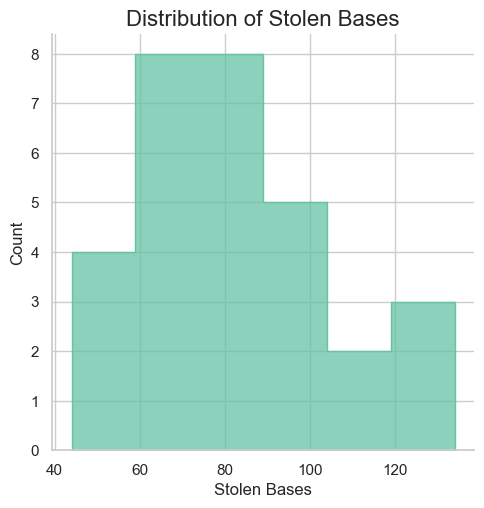

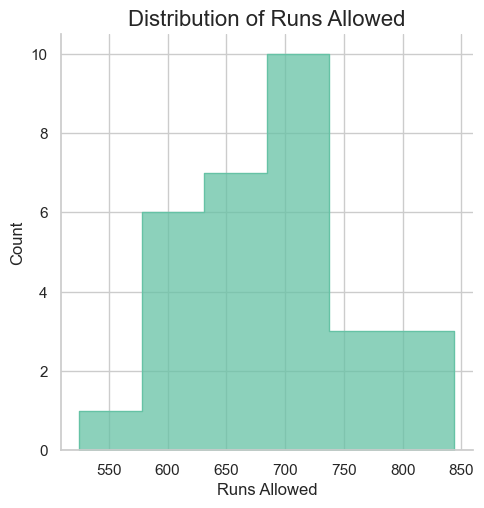

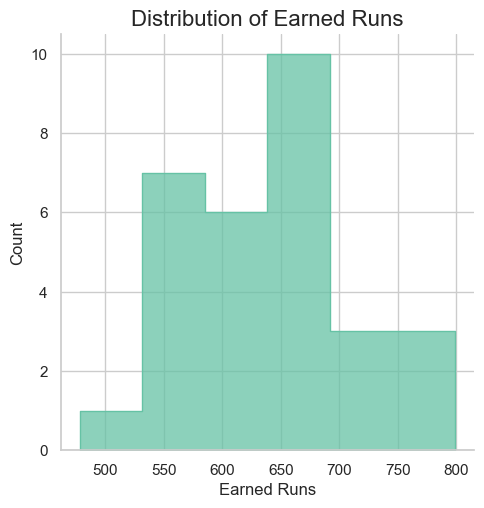

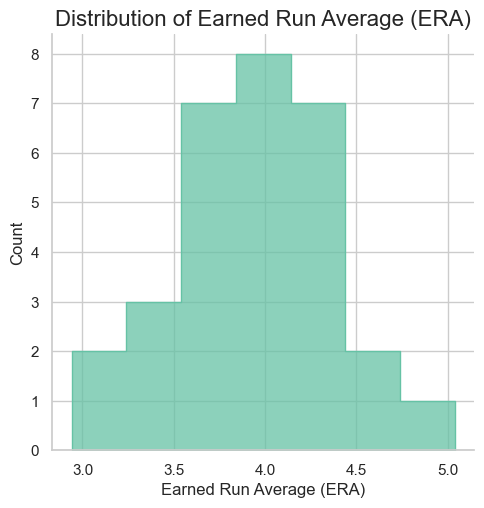

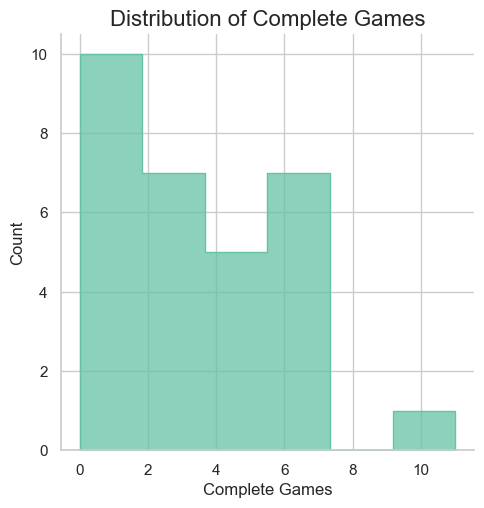

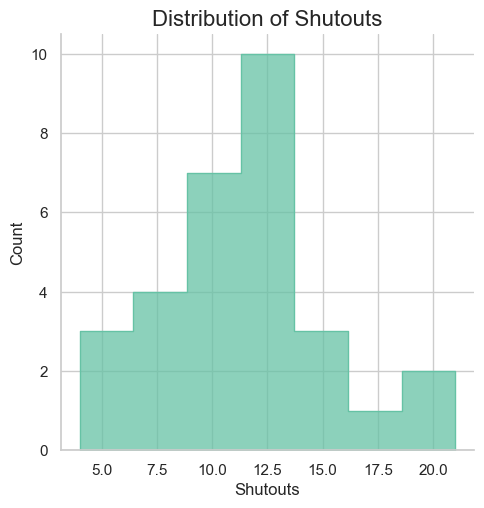

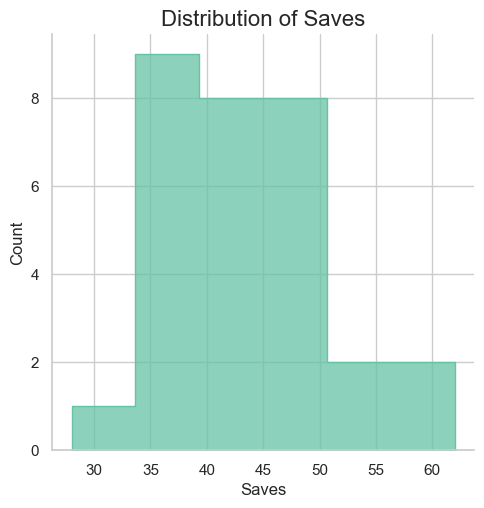

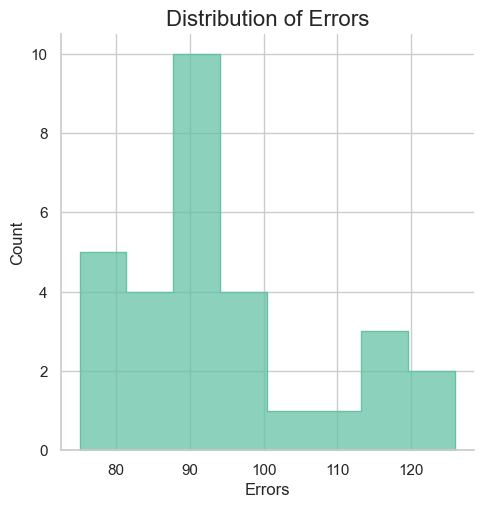

In [19]:
sns.set(style="whitegrid")  # Set a style
custom_palette = sns.color_palette("Set2")  # Choose a custom color palette

for i in df.columns:
    sns.displot(df, x=i, element='step', color=custom_palette[0]).set_axis_labels(x_var=i, y_var="Count")
    plt.title(f"Distribution of {i}", fontsize=16)
    plt.show()

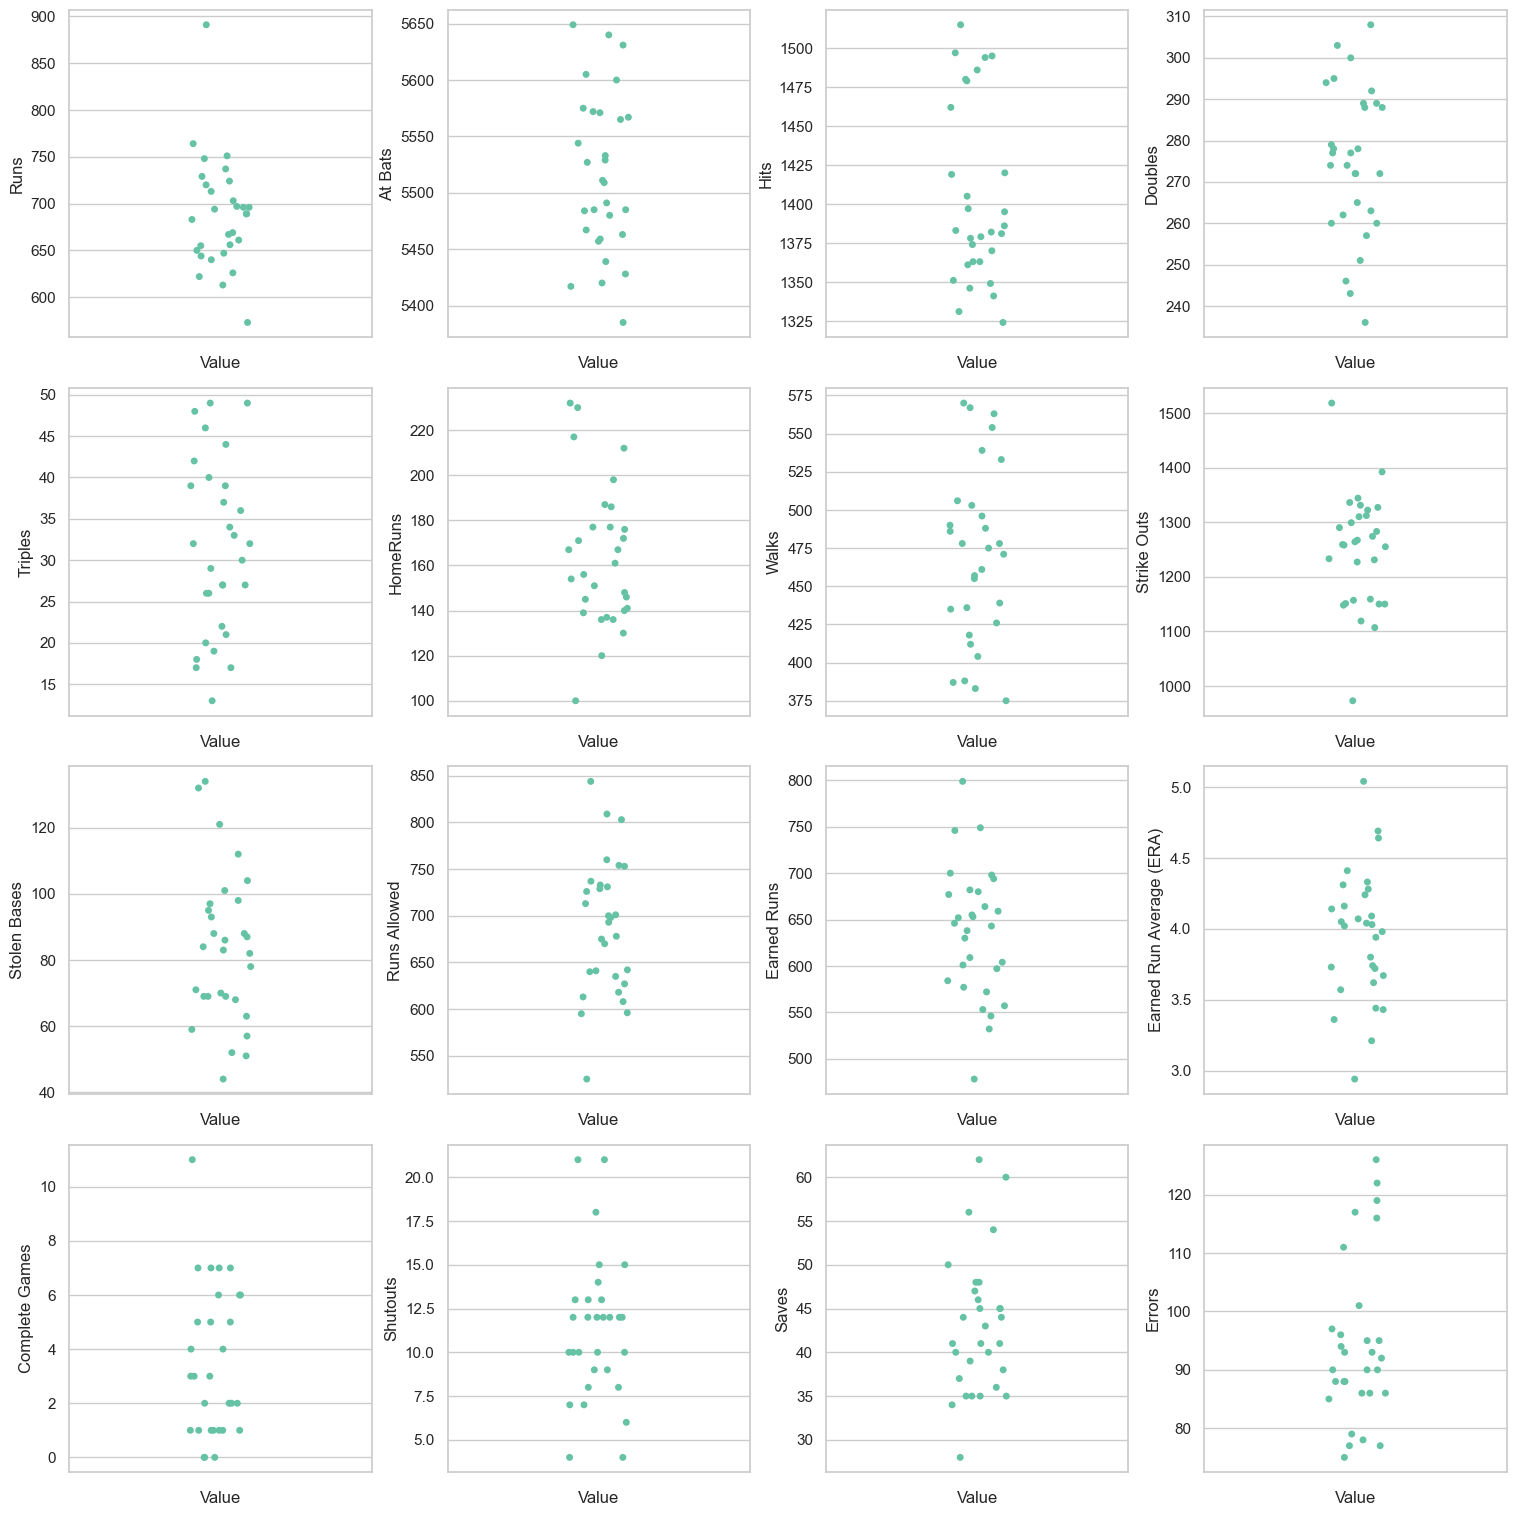

In [20]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15, 15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()

for col, value in features.items():
    sns.stripplot(y=col, data=df, ax=ax[index], palette=custom_palette)
    ax[index].set_ylabel(col, fontsize=12)
    ax[index].set_xlabel("Value", fontsize=12)

    index += 1

plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

## Checking outliers

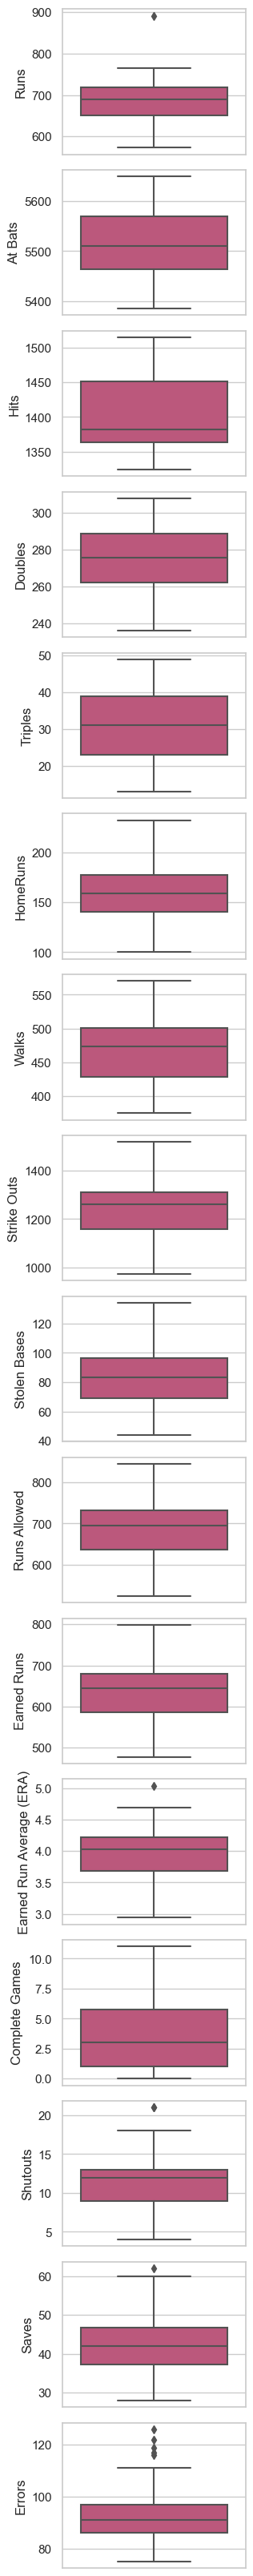

In [21]:
fig, ax = plt.subplots(ncols=1, nrows=16, figsize=(3,32))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette='plasma')
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

There are some outliers in Runs Scored, Earned Run Average, Shut Outs, Saves and Error columns

In [22]:
from scipy.stats import zscore

z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss after outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (30, 17)
Shape of the dataframe after removing outliers:  (29, 17)
Percentage of data loss after outlier removal:  3.3333333333333335


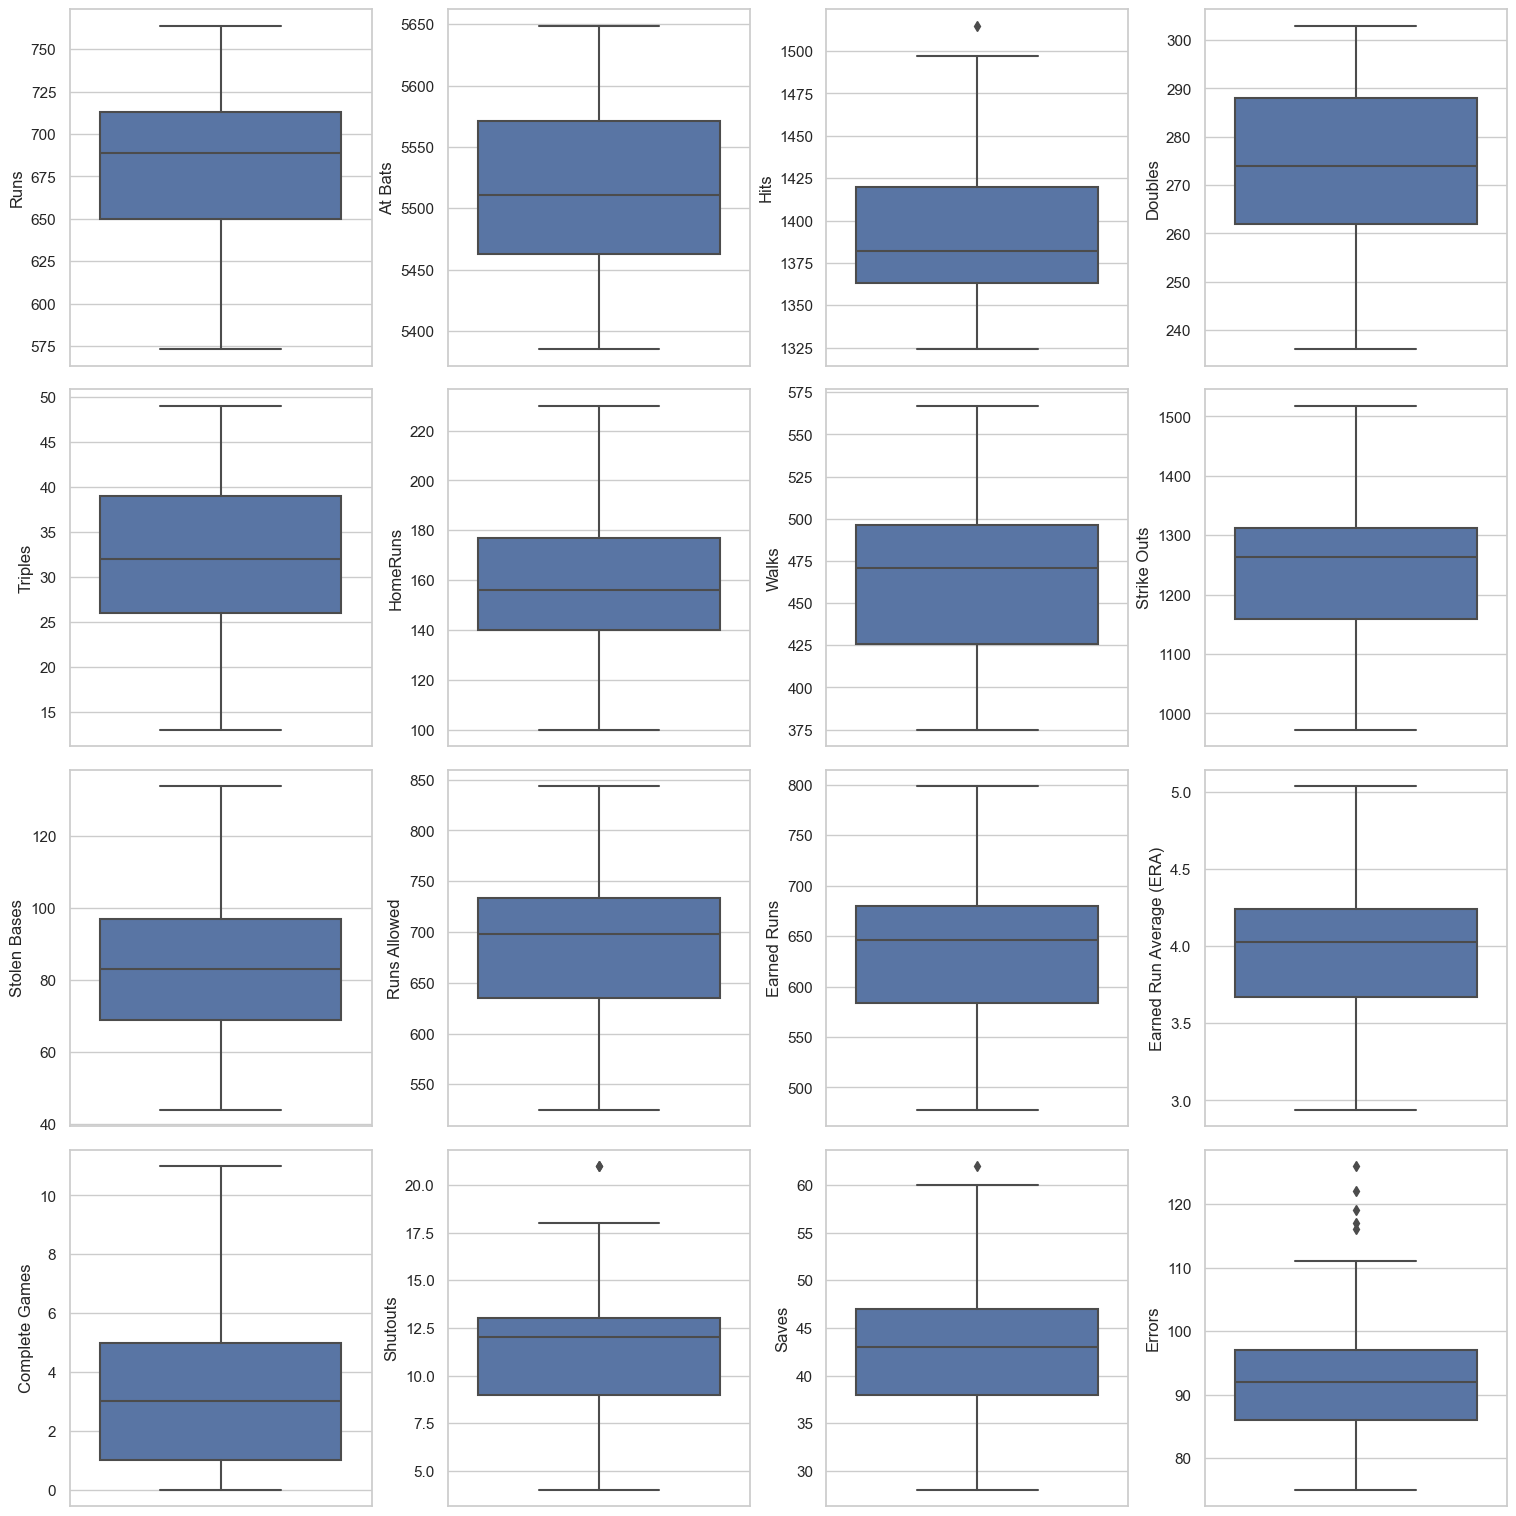

In [24]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df1.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df1, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

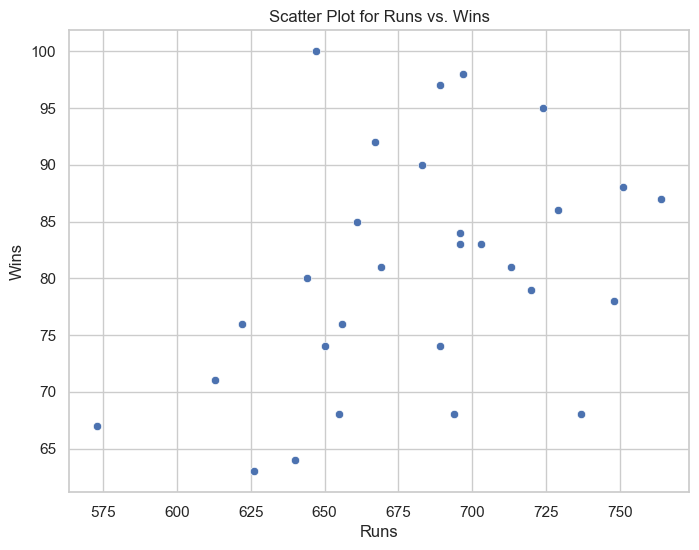

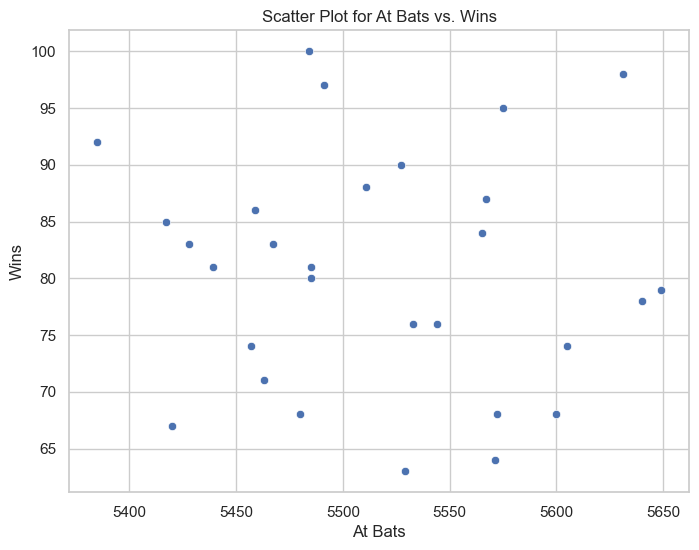

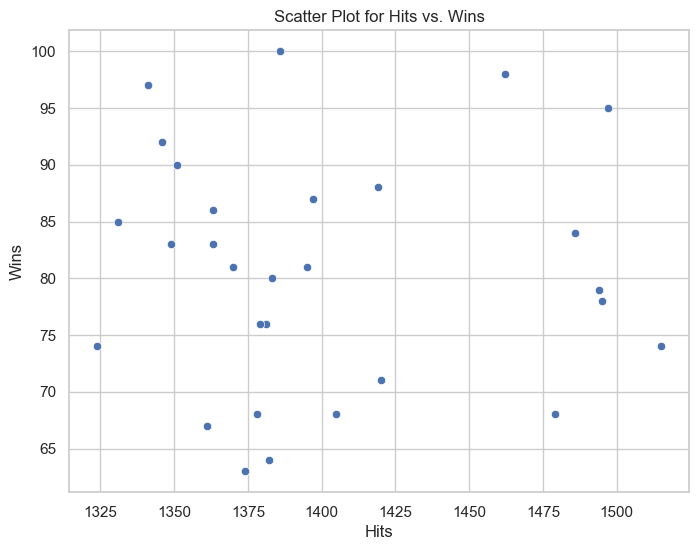

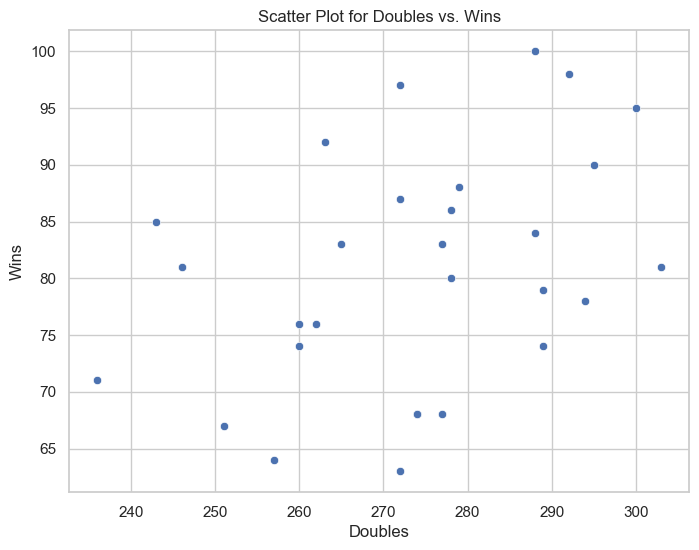

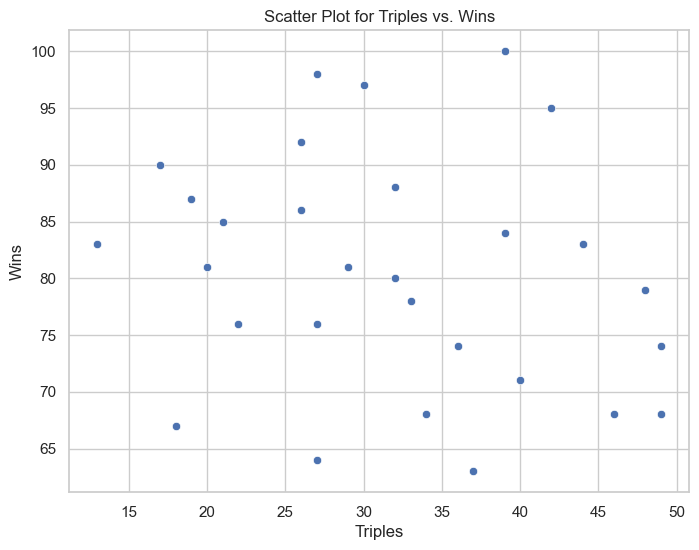

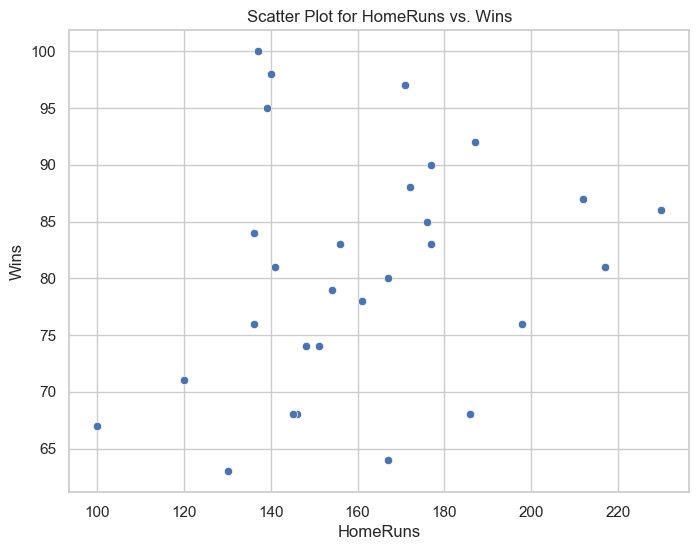

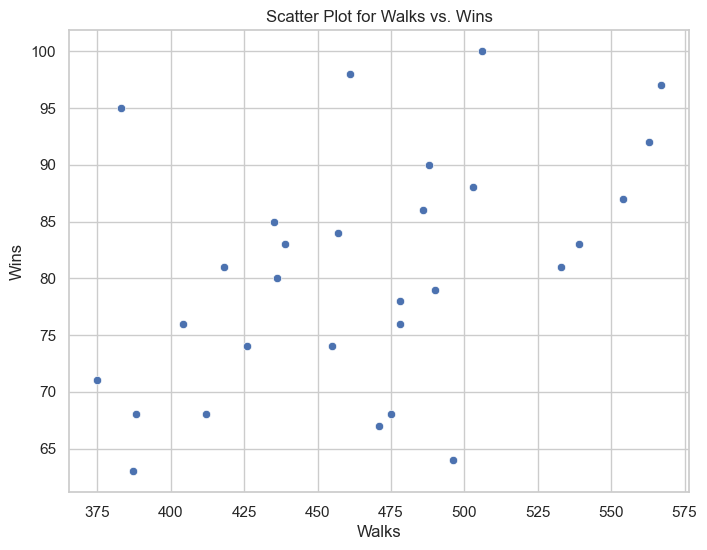

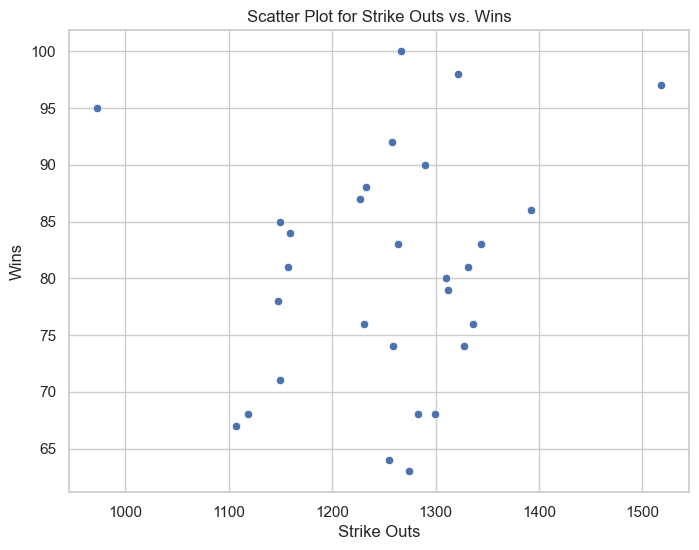

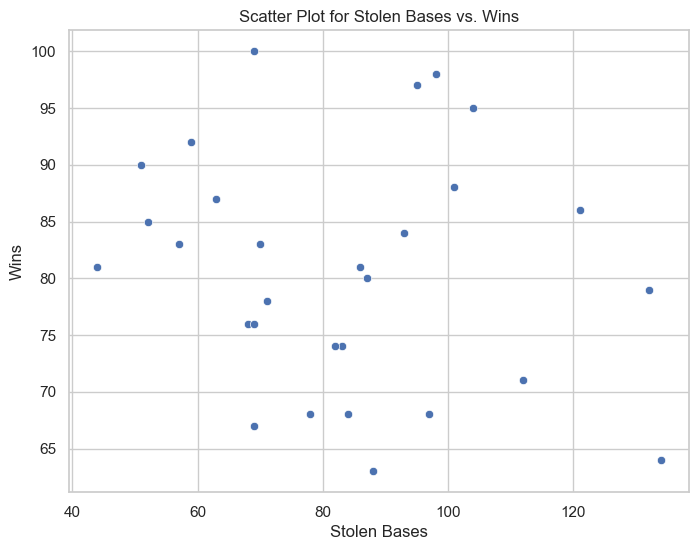

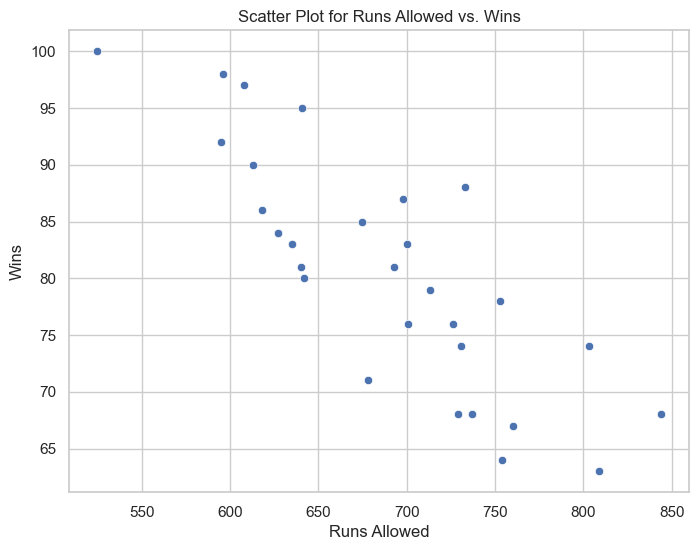

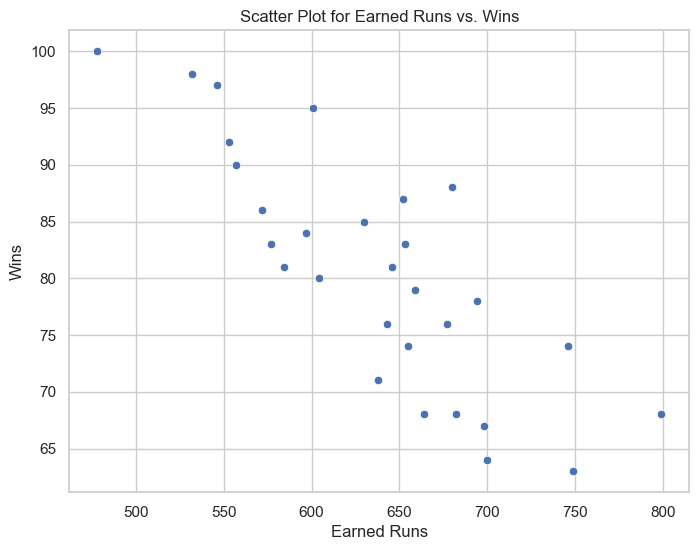

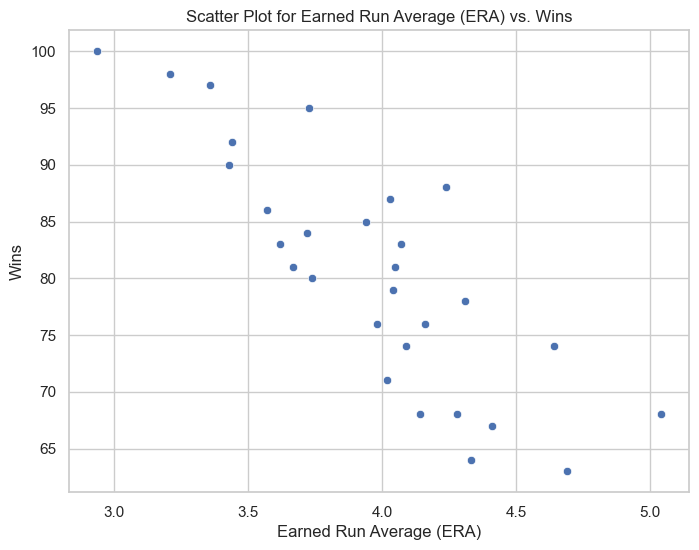

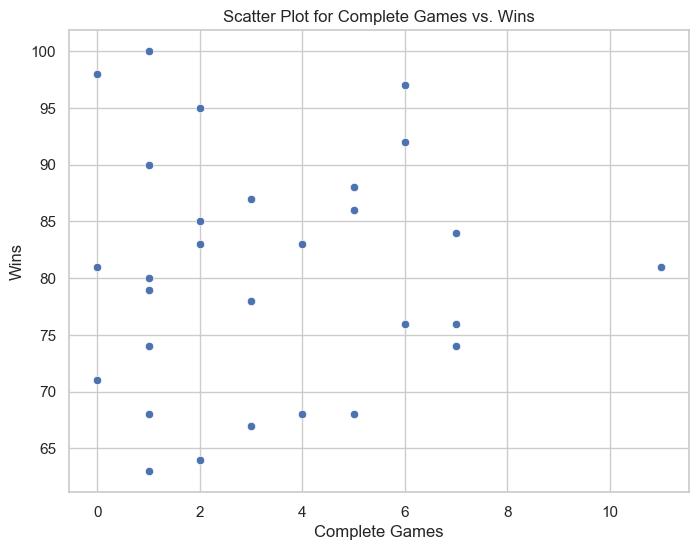

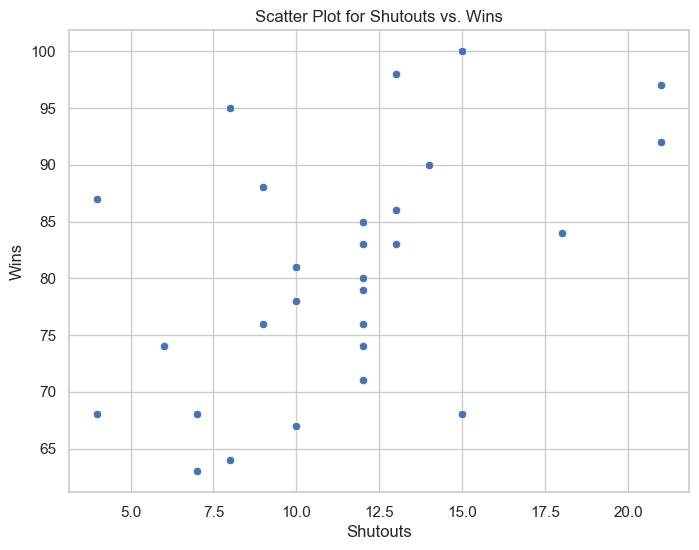

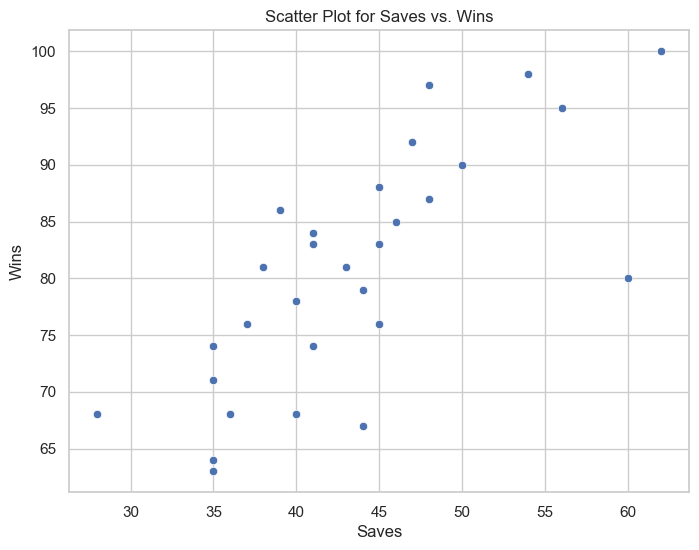

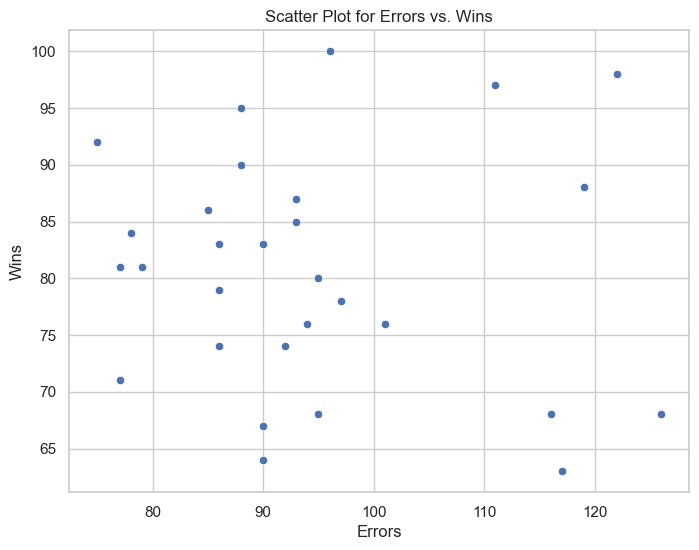

In [25]:
features = df.drop("Wins", axis=1)

for col in features.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y="Wins", data=df, palette="viridis")
    plt.title(f"Scatter Plot for {col} vs. Wins") 
    plt.xlabel(col)
    plt.ylabel("Wins")  
    plt.show()

## Checking Skewness

Wins = 0.11276693557129294


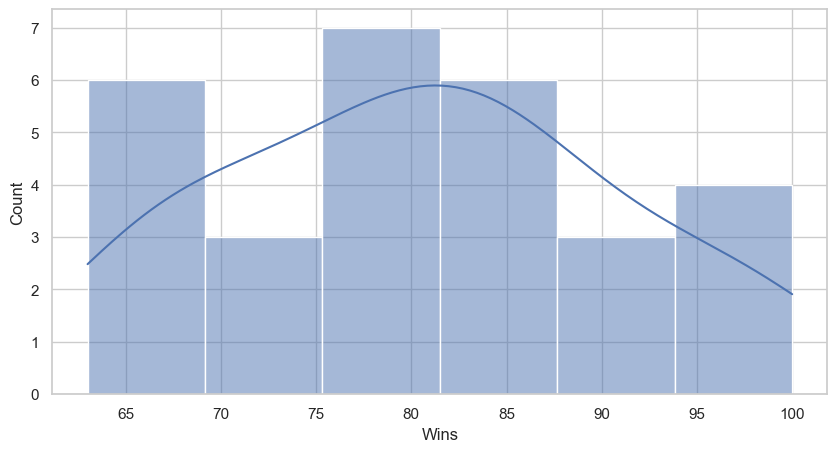

Runs = -0.20406011203640076


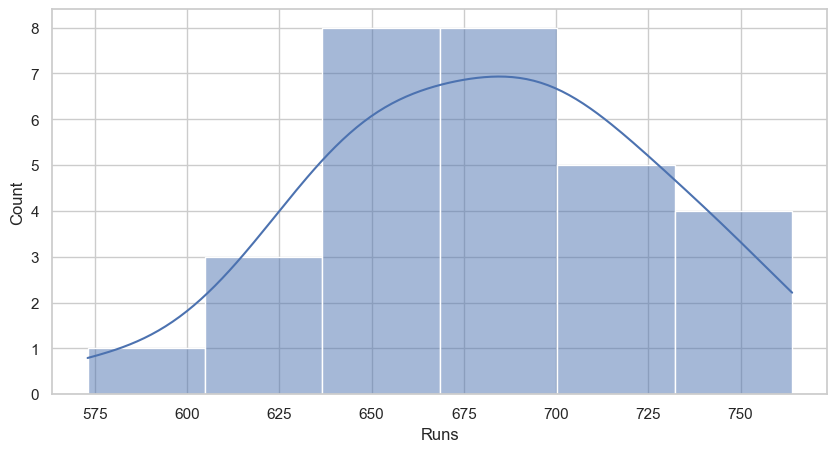

At Bats = 0.16067299318317793


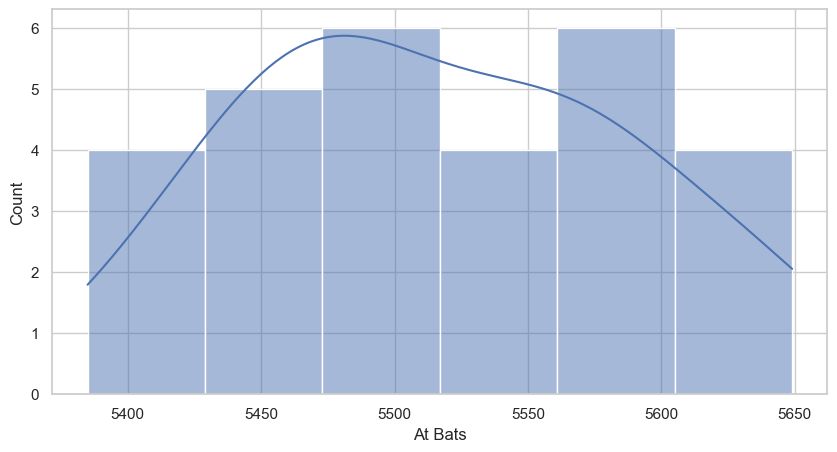

Hits = 0.7426353382402017


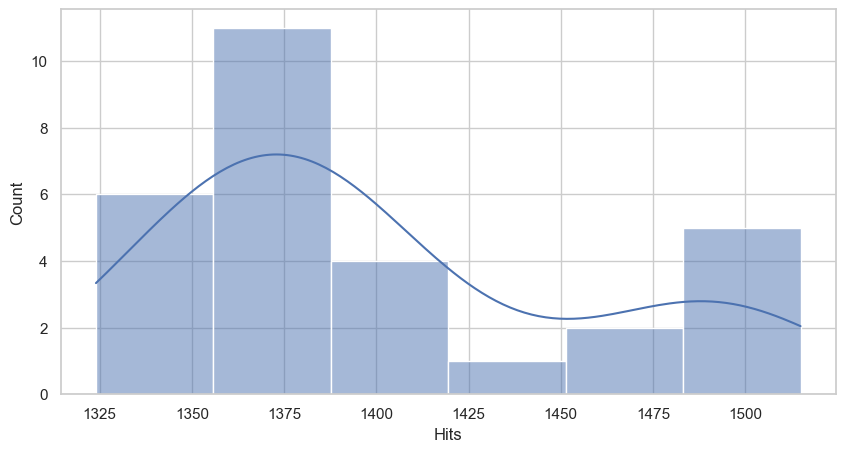

Doubles = -0.31770525706395997


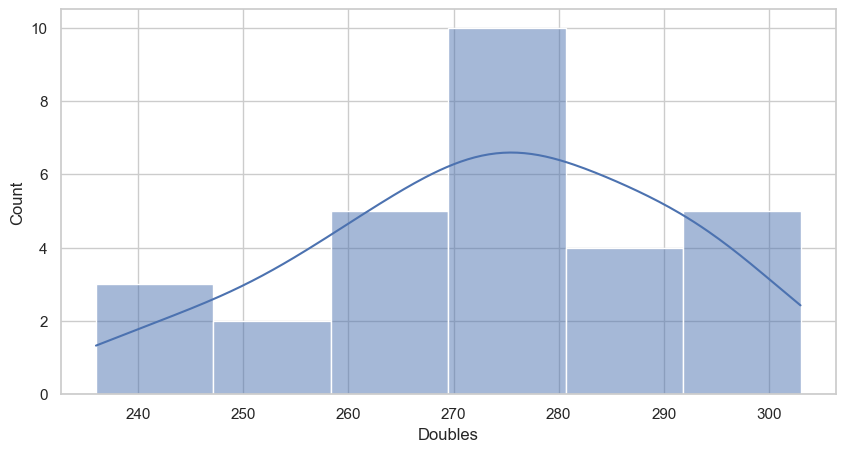

Triples = 0.08539410248772253


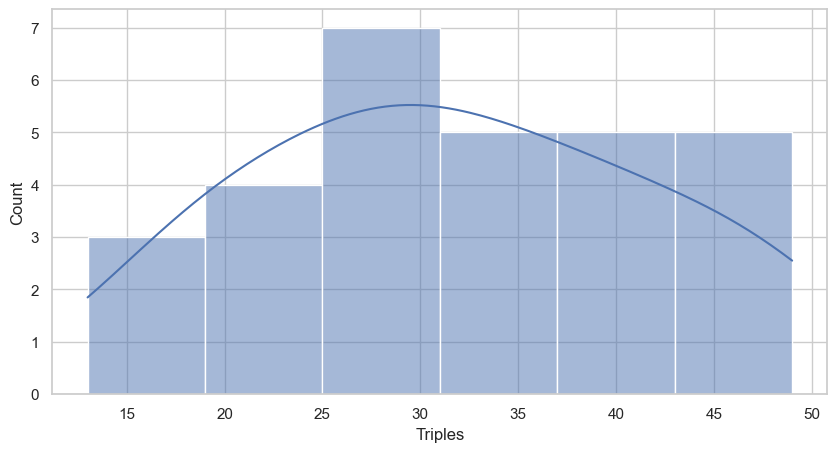

HomeRuns = 0.427197772372019


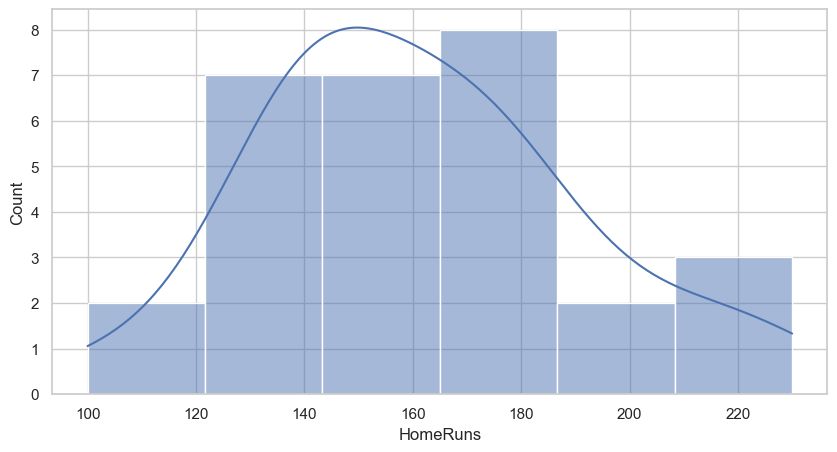

Walks = 0.14325736043584017


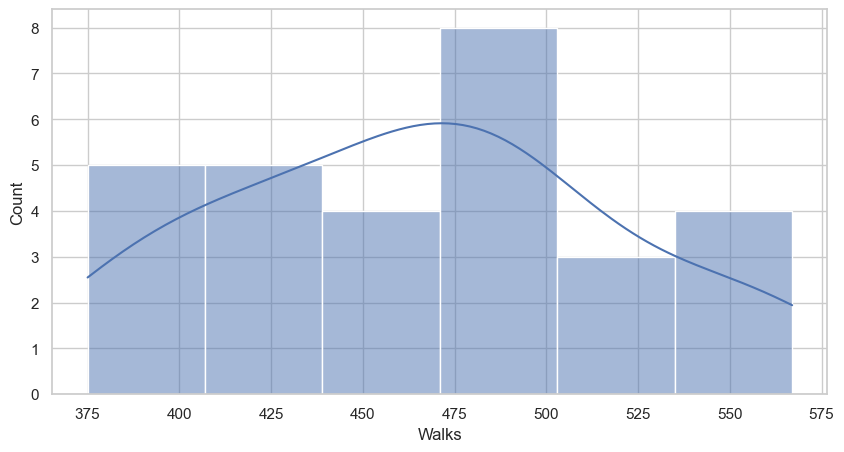

Strike Outs = -0.2215429668493466


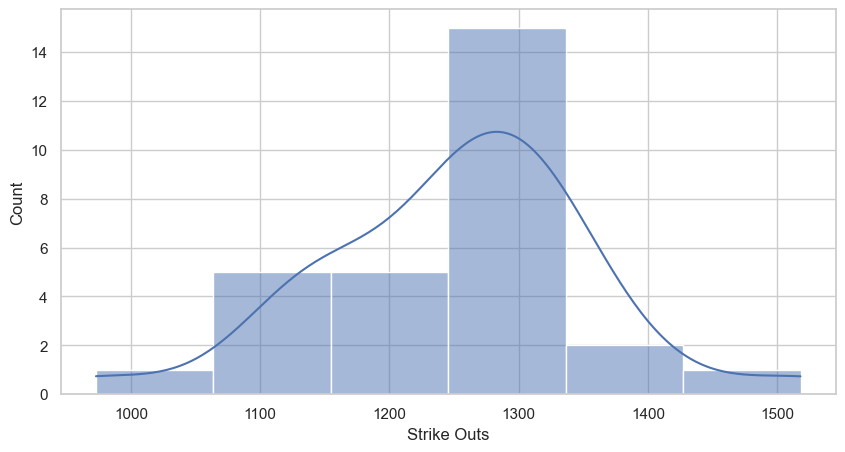

Stolen Bases = 0.46898711615548905


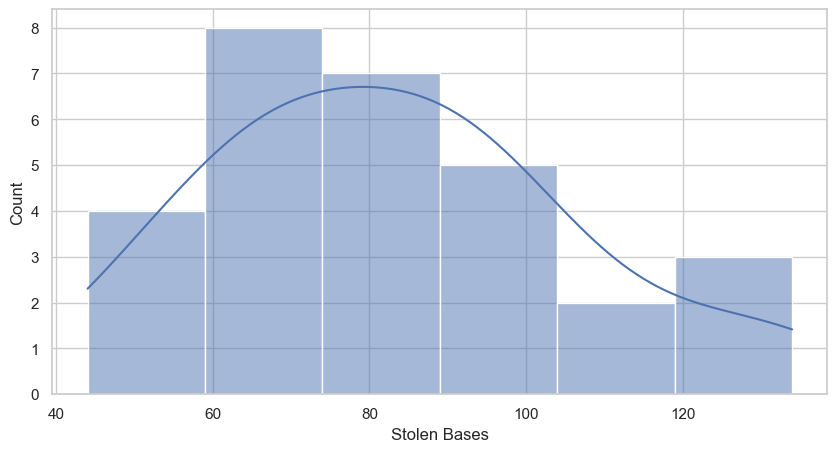

Runs Allowed = 0.017202289030994758


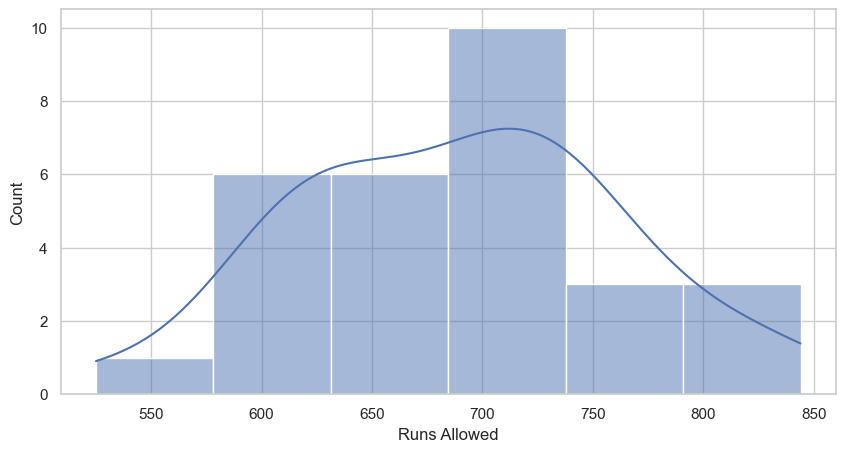

Earned Runs = 0.017492051216126122


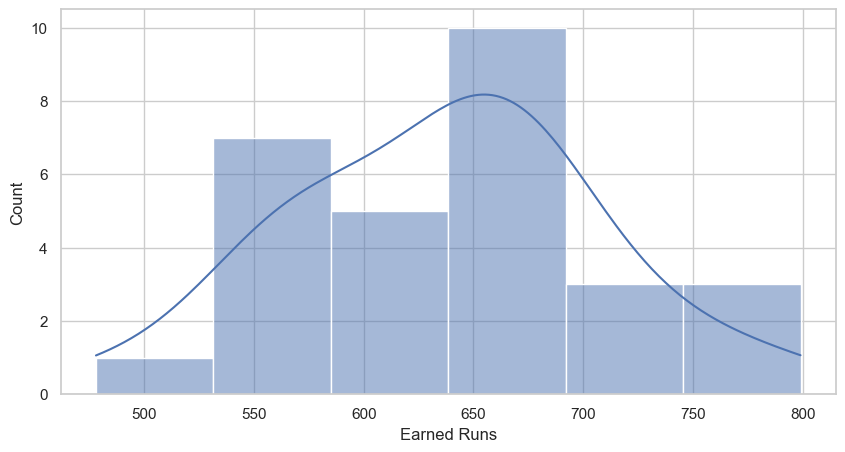

Earned Run Average (ERA) = 0.01581706170438952


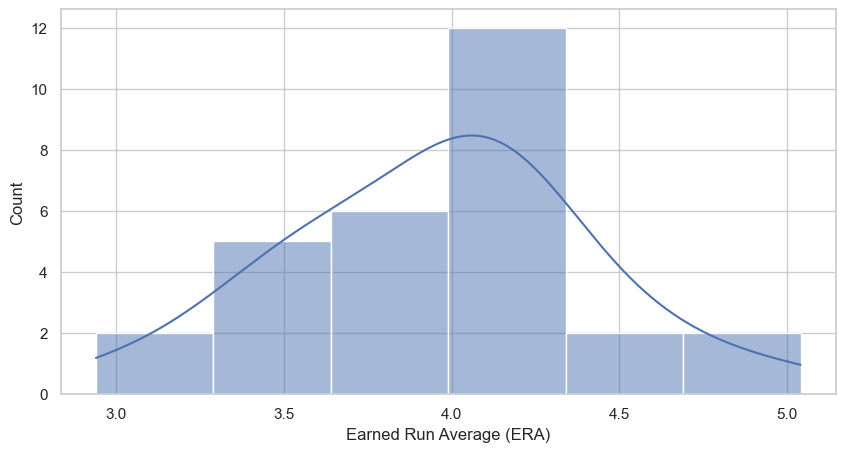

Complete Games = 0.8101053438609993


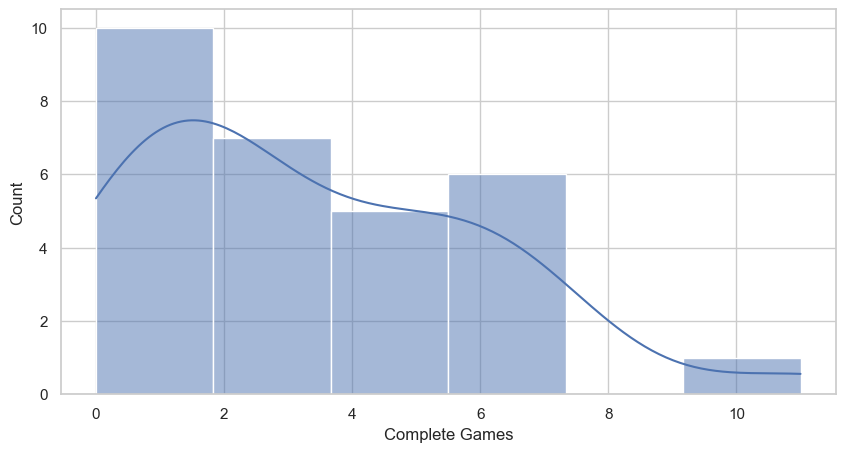

Shutouts = 0.49928605613953103


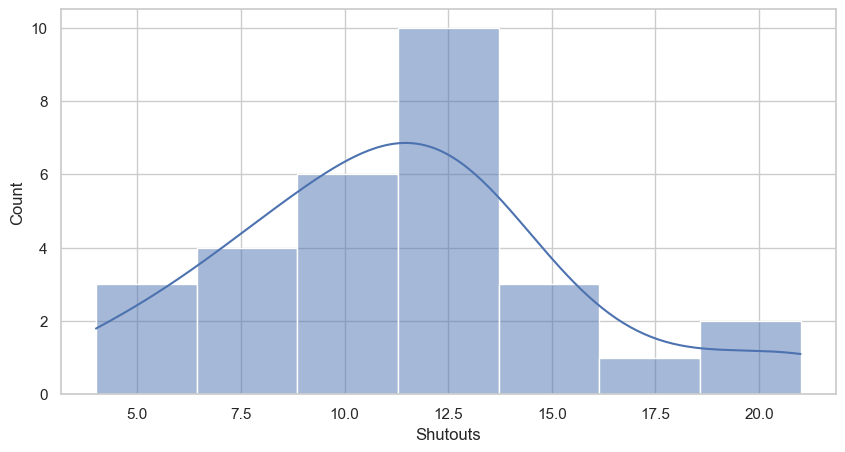

Saves = 0.5945467030287168


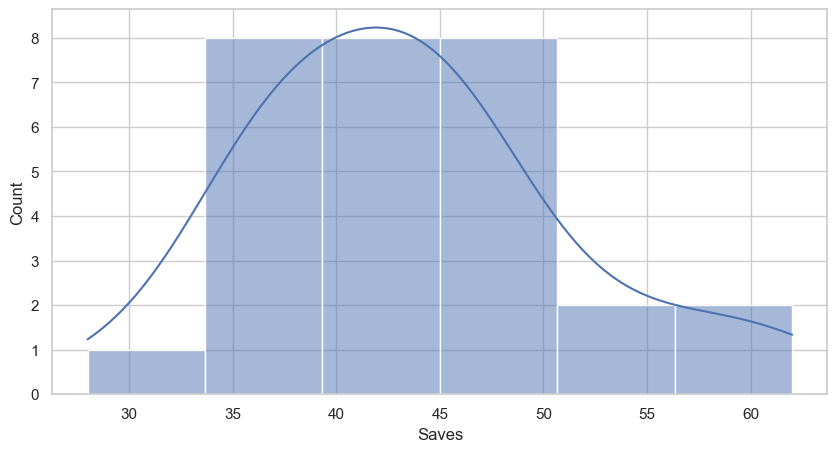

Errors = 0.7961689324660232


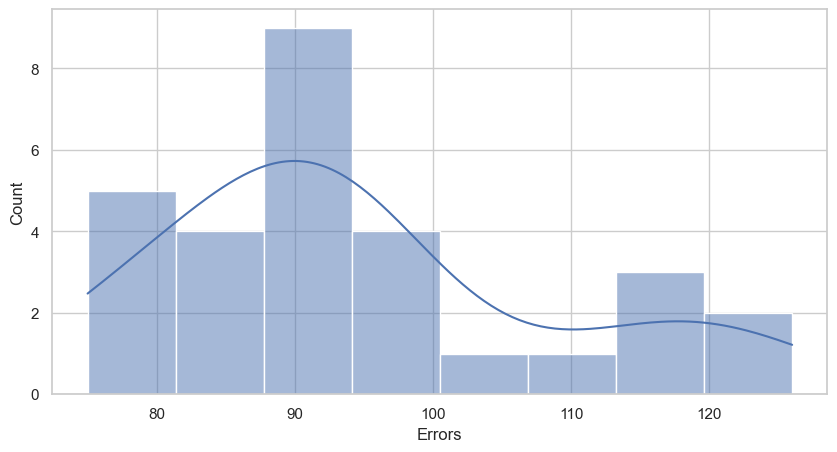

In [26]:
from scipy.stats import skew
for i in df1:
    print(i, "=", skew(df1[i]))
    plt.figure(figsize=(10,5))
    sns.histplot(df1[i], kde = True)
    plt.show()

# Seprating features and label

In [27]:
x = df.drop('Wins', axis=1)
y = df['Wins']

## Scaling Features using standard scaler:

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Runs,At Bats,Hits,Doubles,Triples,HomeRuns,Walks,Strike Outs,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.363013,0.159299,-1.090948,-0.614898


Scaling my feature data to ensure there is no biasness over a particular column instead we will have a uniform dataset value.

# Principle Component Analysis(PCA)

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16, svd_solver="full")
x = pd.DataFrame(pca.fit_transform(x), columns=x.columns)
x

,Runs,At Bats,Hits,Doubles,Triples,HomeRuns,Walks,Strike Outs,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
0,1.040418,-2.998482,2.390631,-0.782861,-2.440002,-0.007693,0.640910,0.339132,0.837185,-0.021962,-0.596074,-0.288474,-0.148793,0.184951,-0.073924,0.009493
1,0.082502,0.473554,0.333381,-0.182392,-0.320951,0.467551,-1.039055,1.231838,0.189278,-0.677803,0.614050,-0.211540,0.019737,0.491118,0.052067,-0.032228
2,-1.234703,-0.852540,-0.038259,3.252264,-0.757129,-0.714970,1.549105,1.351710,0.130466,0.547696,0.505778,0.097515,0.097915,-0.108510,-0.007910,0.000761
3,0.680562,1.423353,0.804293,0.994373,0.358662,-0.945762,-0.009278,-0.101724,0.144915,1.581640,-0.479499,0.121201,0.720541,0.244642,0.004039,-0.012332
4,3.375800,-1.483663,-0.739327,1.793146,-0.109332,0.217560,-1.128995,0.293687,-1.216725,0.140332,-0.087418,0.171118,0.026218,-0.284547,-0.094729,-0.013489
5,-0.329446,-0.226394,-2.762484,-1.300450,-1.693950,-1.053420,1.057617,-0.426011,-0.077575,-0.567319,0.166482,0.141720,0.833282,-0.003566,0.107151,-0.006712
6,-0.708705,2.230857,-1.603350,-1.601015,-1.676362,0.858409,-1.233220,-0.557468,0.106016,0.558265,0.123334,0.225442,-0.001087,-0.001686,-0.014340,0.023542
7,-1.402802,-0.019392,1.155383,-1.545183,0.051551,0.432543,-0.010320,0.861289,-0.729311,-0.073429,-0.847197,-0.435728,-0.167266,-0.155419,0.052123,0.008779
8,2.148232,-1.993567,-0.923356,-0.089902,-1.171097,-1.143858,-0.387613,-0.841622,-0.334200,-0.149301,0.461296,0.062081,-0.329627,0.017876,-0.043741,0.007278
9,1.036721,-0.929021,-1.425914,-0.335159,0.622014,-1.038534,0.793520,0.338591,0.841189,-0.953543,-0.819650,0.410281,-0.349550,0.141352,-0.007414,-0.016445


Ideally PCA is used for reducing dimentionality on bigger dataset however its used here to check if it can assist with the skewness of data

## Power Tranformation

In [30]:
from sklearn.preprocessing import PowerTransformer
power_t = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(power_t.fit_transform(x), columns=x.columns)
x

,Runs,At Bats,Hits,Doubles,Triples,HomeRuns,Walks,Strike Outs,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
0,0.459062,-1.719852,1.631973,-0.587187,-2.376480,0.158816,0.882270,0.533961,1.242253,0.054829,-1.169515,-0.761882,-0.289670,0.896761,-1.173551,0.592520
1,0.018814,0.259141,0.269942,-0.005600,-0.251194,0.606159,-1.511412,1.624422,0.341689,-1.253026,1.248925,-0.568555,0.224876,2.081552,0.827167,-2.028934
2,-0.571106,-0.512844,0.009884,2.134184,-0.667610,-0.679551,1.769509,1.761163,0.254940,0.974738,1.011355,0.229682,0.434890,-0.467190,-0.110128,0.110787
3,0.292724,0.829126,0.591287,0.877483,0.363866,-0.993965,0.109325,-0.073300,0.276348,2.341643,-0.958141,0.292414,1.688052,1.143772,0.078788,-0.674856
4,1.555833,-0.871606,-0.498786,1.363558,-0.054801,0.380900,-1.673555,0.474073,-2.005557,0.335233,-0.217907,0.425314,0.242934,-1.420830,-1.515521,-0.748102
5,-0.167434,-0.152204,-2.048011,-1.152066,-1.602315,-1.146755,1.309720,-0.560932,-0.060817,-1.014902,0.291904,0.346932,1.861825,0.052411,1.665076,-0.327928
6,-0.337329,1.320734,-1.148774,-1.503196,-1.584349,0.925442,-1.865067,-0.767417,0.218571,0.990342,0.203404,0.570984,0.166017,0.061379,-0.212236,1.303219
7,-0.645444,-0.031567,0.826385,-1.436775,0.091545,0.575744,0.107939,1.188912,-1.135150,-0.037910,-1.613853,-1.126865,-0.351396,-0.711389,0.828024,0.554310
8,0.976222,-1.158878,-0.635412,0.075704,-1.074701,-1.277999,-0.431090,-1.229087,-0.469767,-0.177964,0.914813,0.136244,-0.939512,0.153975,-0.683210,0.473367
9,0.457348,-0.556540,-1.013647,-0.145071,0.591428,-1.125402,1.043576,0.533251,1.247561,-1.875204,-1.565787,1.074222,-1.017338,0.710610,-0.102269,-0.938331


Using the 'yeo-johnson' method as 'box-cox' can be used only on positive data. Since we do not have much data I am trying not to lose more rows by removing outliers. However if needed we can remove outliers later to increace accuracy of model

## Checking Multicollinearity:

In [35]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF FACTOR"]= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

calc_vif(x)

,variables,VIF FACTOR
0,Runs,1.006531
1,At Bats,1.003351
2,Hits,1.002306
3,Doubles,1.016767
4,Triples,1.006570
5,HomeRuns,1.024320
6,Walks,1.016928
7,Strike Outs,1.008416
8,Stolen Bases,1.006838
9,Runs Allowed,1.014245


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=43)

In [38]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test.shape:",y_test.shape)

x_train shape: (23, 16)
y_train shape: (23,)
x_test shape: (6, 16)
y_test.shape: (6,)


## LinearRegression

In [41]:
LR= LinearRegression()
LR.fit(x_train, y_train)
pred_LR=LR.predict(x_test)

r2 = LR.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_LR)
mse = mean_squared_error(y_test, pred_LR)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_LR)
msle = mean_squared_log_error(y_test, pred_LR)
evs = explained_variance_score(y_test, pred_LR)
median_err = median_absolute_error(y_test, pred_LR)
max_err = max_error(y_test, pred_LR)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

R-squared: 0.9939107649890383
Mean Absolute Error: 8.632554259431432
Mean Squared Error: 219.59349938518514
Root Mean Squared Error: 14.818687505483917
Mean Absolute Percentage Error: 0.1203955094110691
Mean Squared Logarithmic Error: 0.030394410201930424
Explained Variance Score: -1.855445723539456
Median Absolute Error: 2.793566271842664
Max Error: 34.39857150844807


## KNeighborsRegressor

In [42]:
KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)

r2 = KNN.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_KNN)
mse = mean_squared_error(y_test, pred_KNN)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_KNN)
msle = mean_squared_log_error(y_test, pred_KNN)
evs = explained_variance_score(y_test, pred_KNN)
median_err = median_absolute_error(y_test, pred_KNN)
max_err = max_error(y_test, pred_KNN)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

R-squared: 0.539929213547482
Mean Absolute Error: 5.277777777777776
Mean Squared Error: 38.12962962962962
Root Mean Squared Error: 6.17491940268289
Mean Absolute Percentage Error: 0.06585983952575959
Mean Squared Logarithmic Error: 0.005650360005646835
Explained Variance Score: 0.2510175566490497
Median Absolute Error: 4.5
Max Error: 11.333333333333329


## DecisionTreeRegressor

In [43]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR = DTR.predict(x_test)

r2 = DTR.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_DTR)
mse = mean_squared_error(y_test, pred_DTR)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_DTR)
msle = mean_squared_log_error(y_test, pred_DTR)
evs = explained_variance_score(y_test, pred_DTR)
median_err = median_absolute_error(y_test, pred_DTR)
max_err = max_error(y_test, pred_DTR)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

R-squared: 1.0
Mean Absolute Error: 8.833333333333334
Mean Squared Error: 97.16666666666667
Root Mean Squared Error: 9.857315388414163
Mean Absolute Percentage Error: 0.1108541291771239
Mean Squared Logarithmic Error: 0.015113304701264102
Explained Variance Score: -0.911973756150902
Median Absolute Error: 8.0
Max Error: 15.0


## Ridge

In [44]:
RR = Ridge()
RR.fit(x_train,y_train)
pred_RR = RR.predict(x_test)


r2 = RR.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_RR)
mse = mean_squared_error(y_test, pred_RR)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_RR)
msle = mean_squared_log_error(y_test, pred_RR)
evs = explained_variance_score(y_test, pred_RR)
median_err = median_absolute_error(y_test, pred_RR)
max_err = max_error(y_test, pred_RR)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

R-squared: 0.9912287020668985
Mean Absolute Error: 6.844426201075263
Mean Squared Error: 89.91020618624314
Root Mean Squared Error: 9.48209924996797
Mean Absolute Percentage Error: 0.09345614753615489
Mean Squared Logarithmic Error: 0.014160712743447733
Explained Variance Score: 0.15237545001968678
Median Absolute Error: 4.491633197012995
Max Error: 21.085972303483032


## Lasso

In [45]:
L = Lasso()
L.fit(x_train,y_train)
pred_L = L.predict(x_test)
print('R2_score',r2_score(y_test,pred_L))
print('Mean absolute error:',mean_absolute_error(y_test,pred_L))
print('Mean squared error:',mean_squared_error(y_test,pred_L))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_L)))

r2 = L.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_L)
mse = mean_squared_error(y_test, pred_L)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_L)
msle = mean_squared_log_error(y_test, pred_L)
evs = explained_variance_score(y_test, pred_L)
median_err = median_absolute_error(y_test, pred_L)
max_err = max_error(y_test, pred_L)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

R2_score 0.40665581019550123
Mean absolute error: 4.104095201678369
Mean squared error: 30.145181198678568
Root mean squared error: 5.490462749047531
R-squared: 0.9028061818234268
Mean Absolute Error: 4.104095201678369
Mean Squared Error: 30.145181198678568
Root Mean Squared Error: 5.490462749047531
Mean Absolute Percentage Error: 0.05417907144210416
Mean Squared Logarithmic Error: 0.00463866883635112
Explained Variance Score: 0.678270936232936
Median Absolute Error: 3.529622119741589
Max Error: 9.880227346245206


## AdaBoostRegressor

In [46]:
abr = AdaBoostRegressor(learning_rate=1.05, n_estimators=300, random_state=42)
abr.fit(x_train,y_train)
pred_abr = abr.predict(x_test)

r2 = abr.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_abr)
mse = mean_squared_error(y_test, pred_abr)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_abr)
msle = mean_squared_log_error(y_test, pred_abr)
evs = explained_variance_score(y_test, pred_abr)
median_err = median_absolute_error(y_test, pred_abr)
max_err = max_error(y_test, pred_abr)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

R-squared: 0.9879191575979787
Mean Absolute Error: 6.25
Mean Squared Error: 49.375
Root Mean Squared Error: 7.026734661277598
Mean Absolute Percentage Error: 0.0807261466905168
Mean Squared Logarithmic Error: 0.007719603293656061
Explained Variance Score: 0.2808911973756152
Median Absolute Error: 7.0
Max Error: 11.0


# Saving the best model

the best model proved to be Linear regression

In [47]:
# Save the model as a objectfile
import joblib

joblib.dump(LR,'Baseball_Case_Study')

['Baseball_Case_Study']